In [166]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np

import cv2
import glob
import time
import pickle

from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from skimage.feature import hog
from sklearn.model_selection import train_test_split

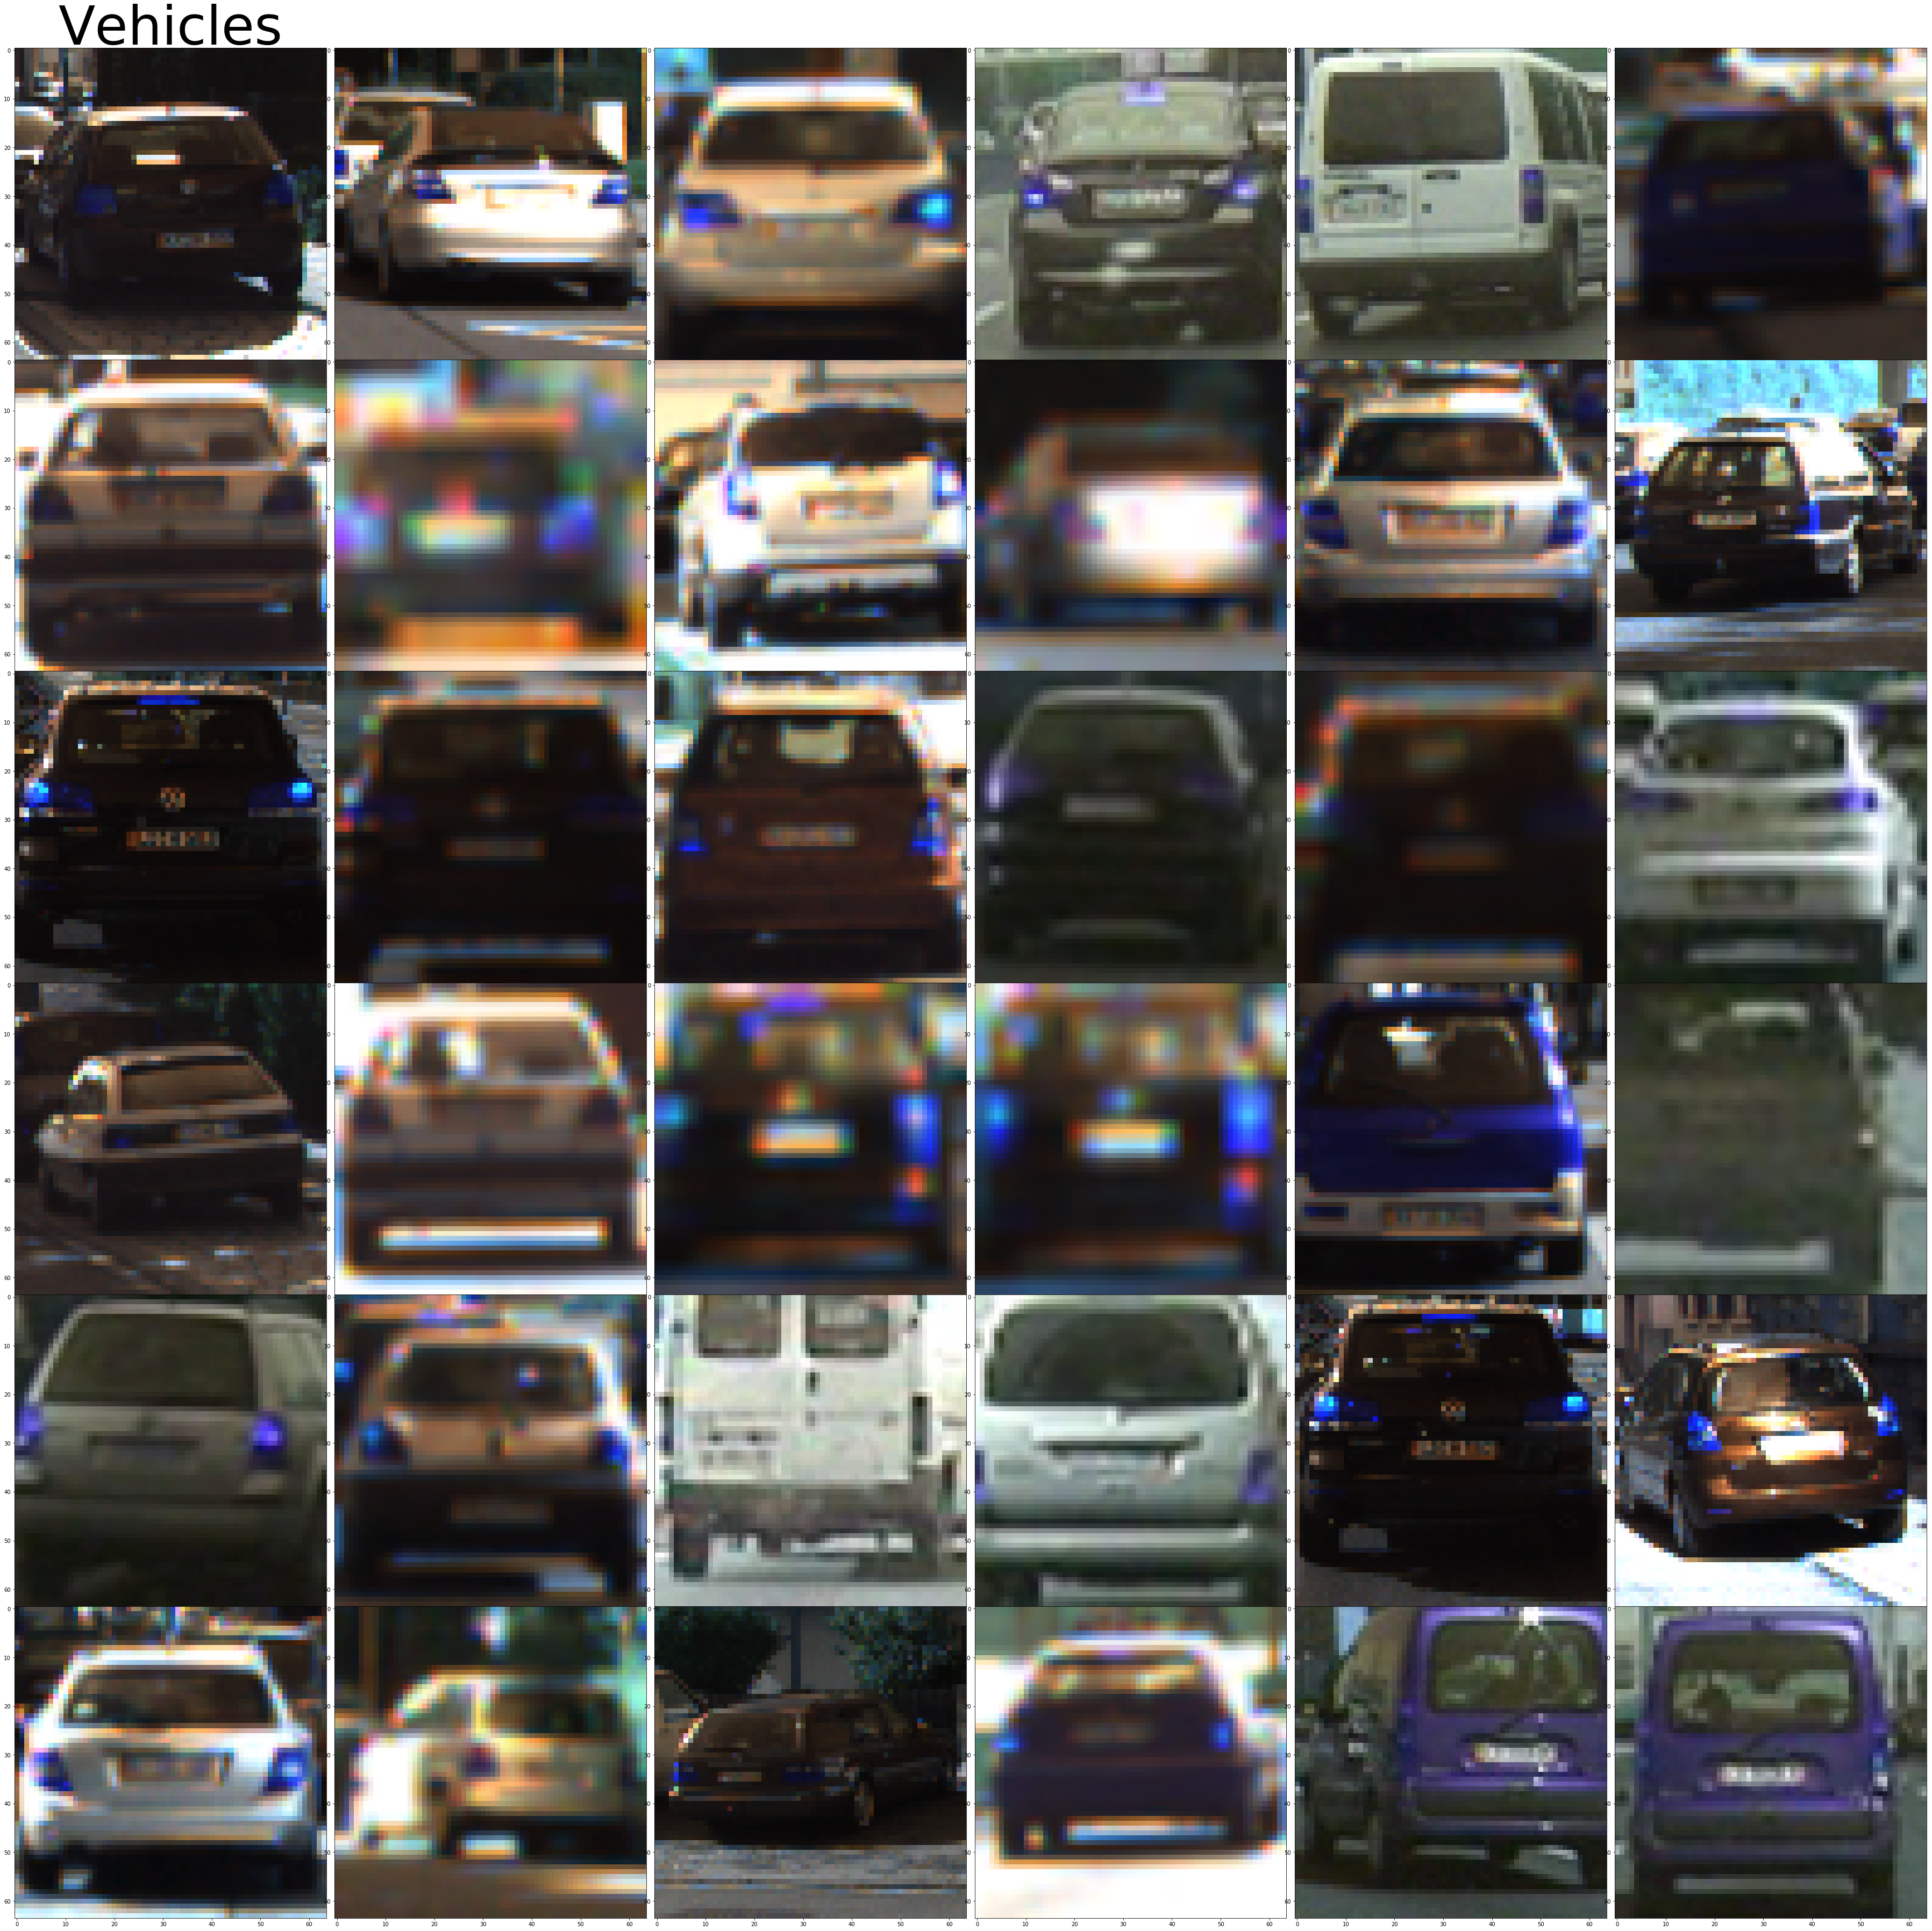

In [167]:
vehicle_n_nonvehicle = glob.glob('train/*/*/*.png')
vehicles = []
non_vehicles = []
all_vehicles =[]
all_non_vehicles = []

for v_and_nv in vehicle_n_nonvehicle:
    if 'non-vehicle' in v_and_nv:
        all_non_vehicles.append(v_and_nv)
    else:
        all_vehicles.append(v_and_nv)
        
for i, non_vehicle in enumerate(all_non_vehicles):
    non_vehicles.append(non_vehicle)
        
for j, vehicle in enumerate(all_vehicles):
    vehicles.append(vehicle)
        
vehicle_len = len(vehicles)
non_vehicle_len = len(non_vehicles)

ran_idx = []
vehicle_img = []
non_vehicle_img = []

for k in range(36):
    ran_idx.append(np.random.randint(0, vehicle_len))
    vehicle_img.append(vehicles[ran_idx[k]])

fig = plt.figure(figsize=(64, 64))
w_ratio = [1 for n in range(6)]
h_ratio = [1 for n in range(6)]
grid = gridspec.GridSpec(6, 6, wspace=0.0, hspace=0.0, width_ratios=w_ratio, height_ratios=h_ratio)

for idx, img in enumerate(vehicle_img):
    vimg = cv2.imread(img)
    ax = plt.Subplot(fig, grid[idx])
    ax.imshow(vimg)
    if idx == 0:
        ax.set_title('Vehicles', fontsize = 100)
    fig.add_subplot(ax)

plt.show()

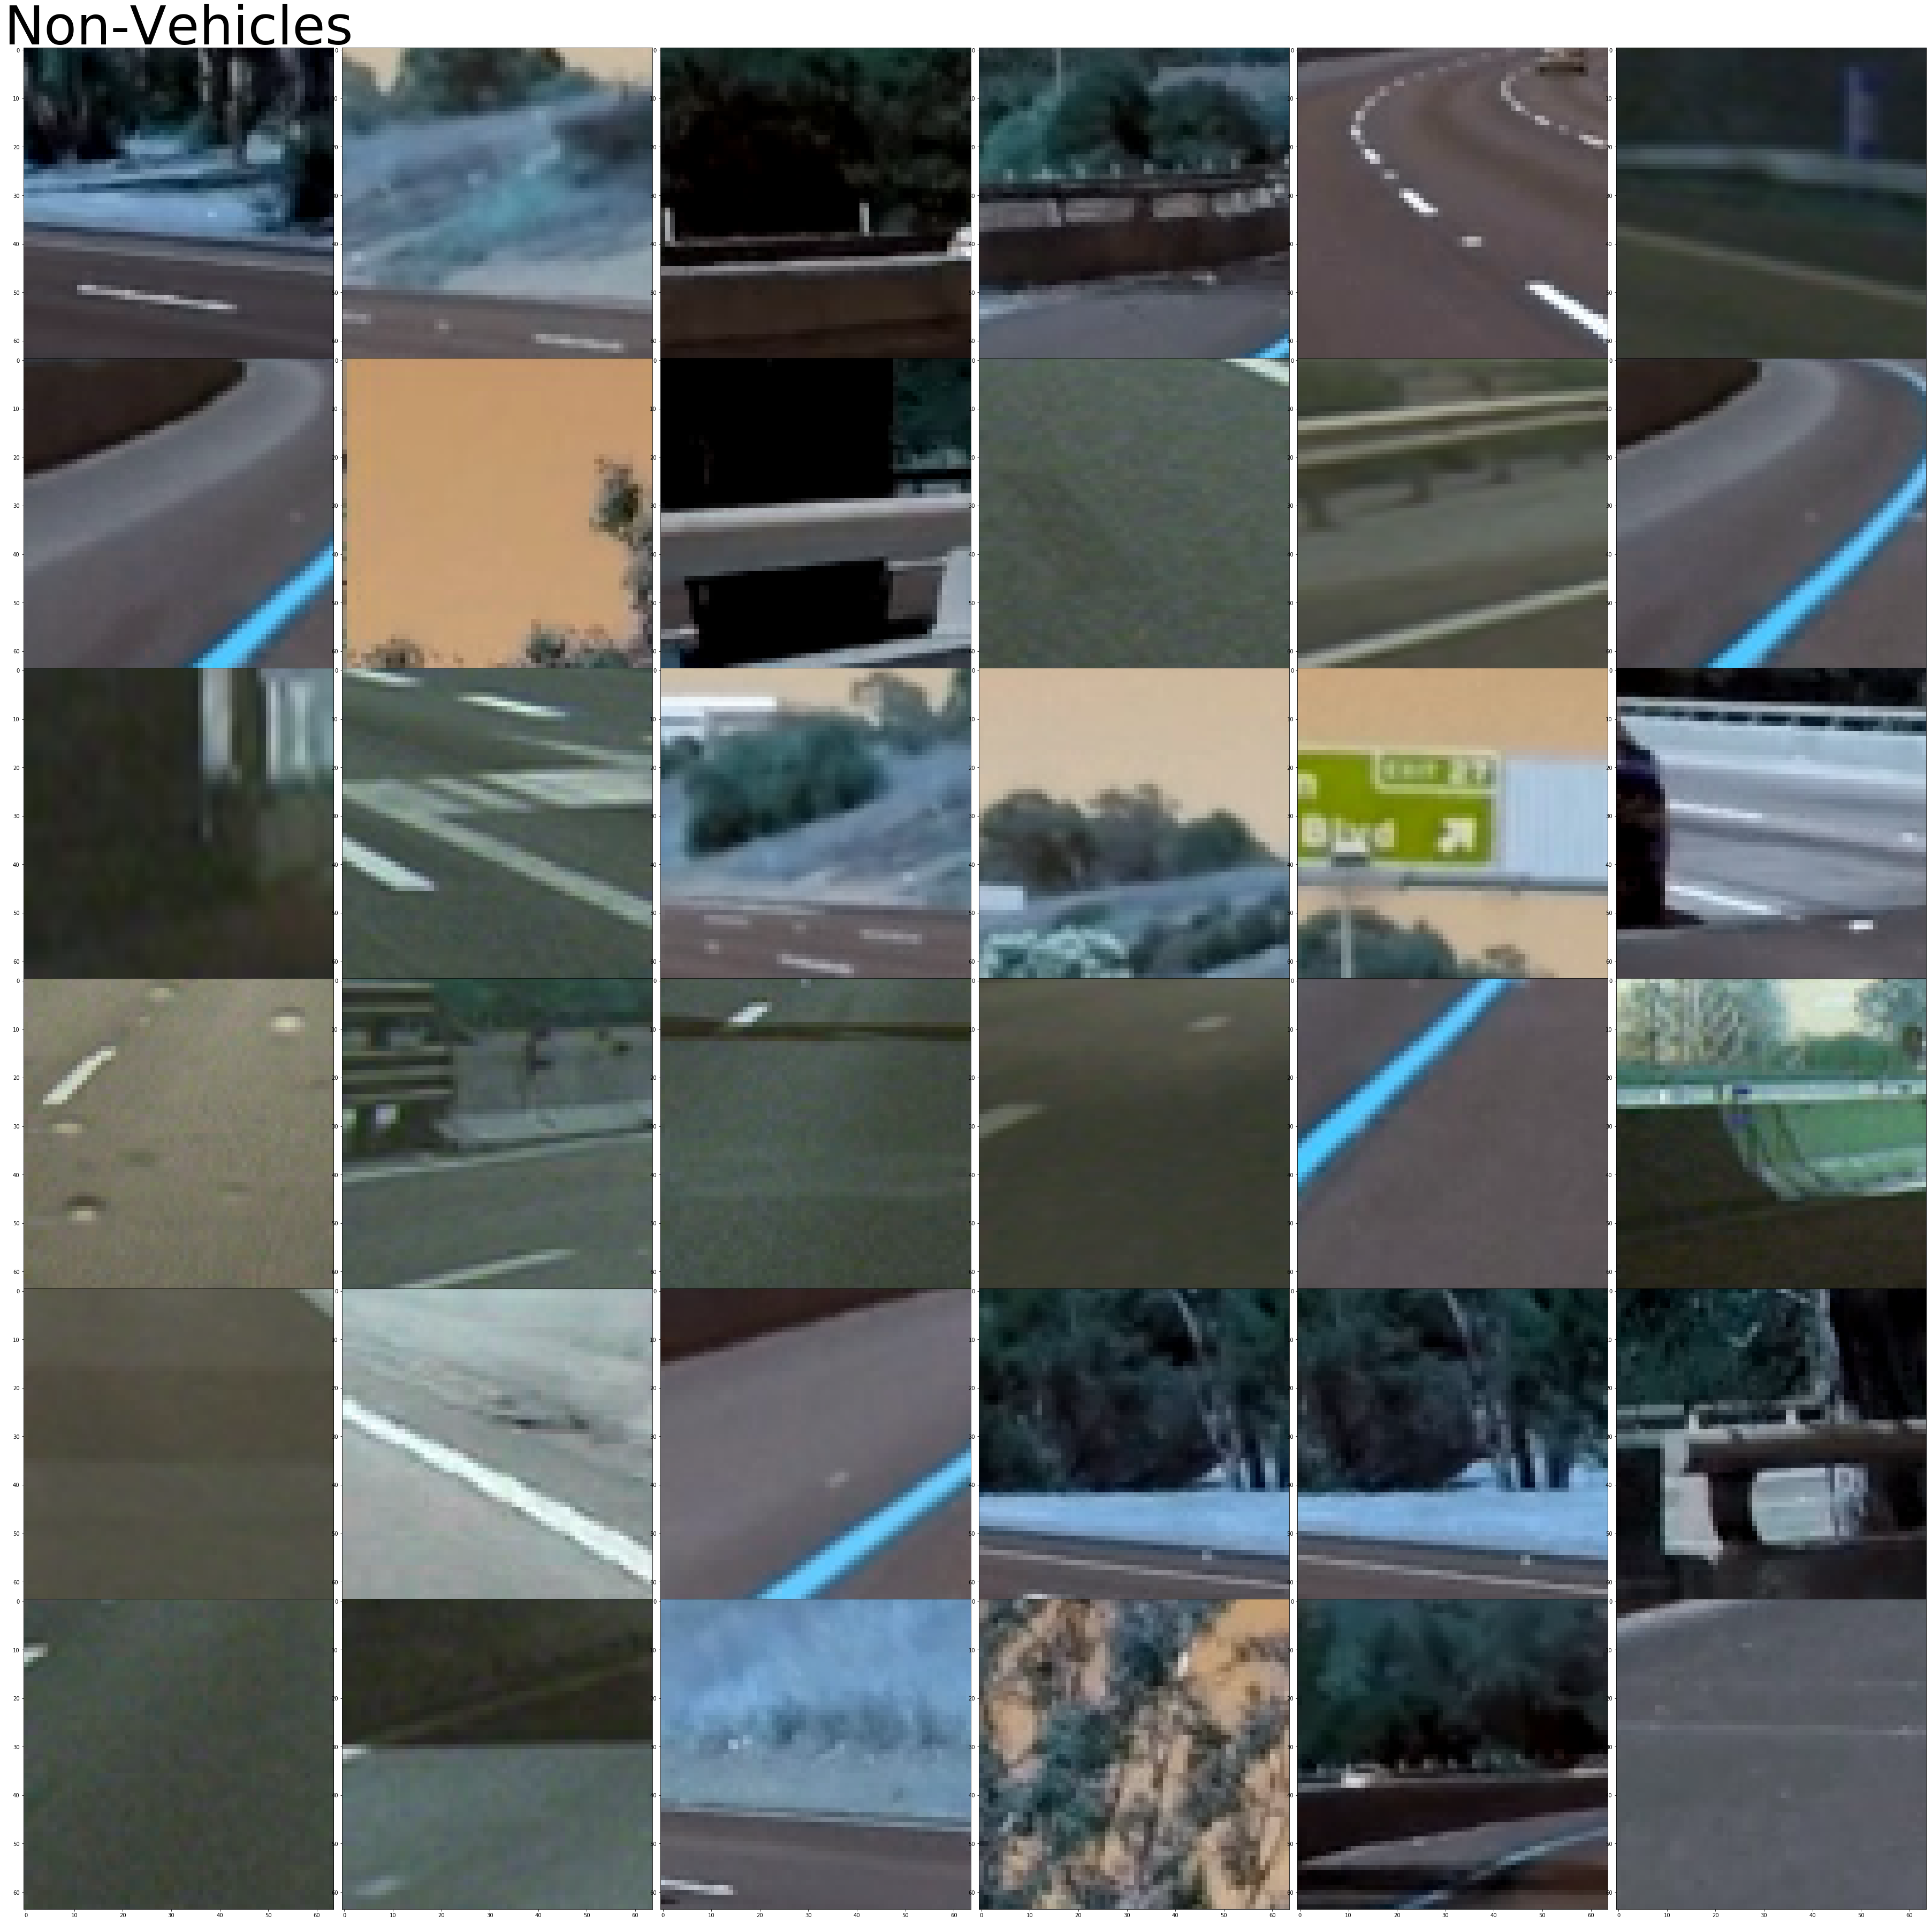

In [168]:
vehicle_n_nonvehicle = glob.glob('train/*/*/*.png')
non_vehicles = []
all_non_vehicles = []

for v_and_nv in vehicle_n_nonvehicle:
    if 'non-vehicle' in v_and_nv:
        all_non_vehicles.append(v_and_nv)
        
for i, non_vehicle in enumerate(all_non_vehicles):
    non_vehicles.append(non_vehicle)
        
non_vehicle_len = len(non_vehicles)

ran_idx = []
non_vehicle_img = []

for k in range(36):
    ran_idx.append(np.random.randint(0, non_vehicle_len))
    non_vehicle_img.append(non_vehicles[ran_idx[k]])

fig = plt.figure(figsize=(64, 64))
w_ratio = [1 for n in range(6)]
h_ratio = [1 for n in range(6)]
grid = gridspec.GridSpec(6, 6, wspace=0.0, hspace=0.0, width_ratios=w_ratio, height_ratios=h_ratio)

for idx, img in enumerate(non_vehicle_img):
    nvimg = cv2.imread(img)
    ax = plt.Subplot(fig, grid[idx])
    ax.imshow(nvimg)
    if idx == 0:
        ax.set_title('Non-Vehicles', fontsize = 100)
    fig.add_subplot(ax)

plt.show()

In [169]:
vehicle_n_nonvehicle = glob.glob('train/*/*/*.png')
vehicles = []
non_vehicles = []
all_vehicles =[]
all_non_vehicles = []

for v_and_nv in vehicle_n_nonvehicle:
    if 'non-vehicle' in v_and_nv:
        all_non_vehicles.append(v_and_nv)
    else:
        all_vehicles.append(v_and_nv)
        
for i, non_vehicle in enumerate(all_non_vehicles):
    non_vehicles.append(non_vehicle)
        
for j, vehicle in enumerate(all_vehicles):
    vehicles.append(vehicle)
        
vehicle_len = len(vehicles)
non_vehicle_len = len(non_vehicles)

train = 0.7
valid = 0.2
tests = 0.1

mini = (train * np.array([vehicle_len, non_vehicle_len])).astype('int')
maxi = ((train + valid) * np.array([vehicle_len, non_vehicle_len])).astype('int')

print(mini)
print(maxi)

vehicle_train = vehicles[:mini[0]]
vehicle_valid = vehicles[mini[0]:maxi[0]]
vehicle_tests = vehicles[maxi[0]:]

non_vehicle_train = non_vehicles[:mini[1]]
non_vehicle_valid = non_vehicles[mini[1]:maxi[1]]
non_vehicle_tests = non_vehicles[maxi[1]:]

#vehicle_train = int(vehicle_len * train)
#vehicle_valid = int(vehicle_len * valid)
#vehicle_tests = int(vehicle_len * tests)

#non_vehicle_train = int(non_vehicle_len * train)
#non_vehicle_valid = int(non_vehicle_len * valid)
#non_vehicle_tests = int(non_vehicle_len * tests)

print('Number of samples in Vehicle Training: ', len(vehicle_train))
print('Number of samples in Vehicle Validation: ', len(vehicle_valid))
print('Number of samples in Vehicle Test: ', len(vehicle_tests))

print('Number of samples in Non-Vehicle Training: ', len(non_vehicle_train))
print('Number of samples in Non-Vehicle Validation: ', len(non_vehicle_valid))
print('Number of samples in Non-Vehicle Test: ', len(non_vehicle_tests))

[6154 6277]
[7912 8071]
Number of samples in Vehicle Training:  6154
Number of samples in Vehicle Validation:  1758
Number of samples in Vehicle Test:  880
Number of samples in Non-Vehicle Training:  6277
Number of samples in Non-Vehicle Validation:  1794
Number of samples in Non-Vehicle Test:  897


In [170]:
vehicle_true_false_file = 'vehicle_true_false_data.p'
print('Saving Vehicle true false data to pickle file')
try:
    with open(pickle_file, 'wb') as pfile:
        pickle.dump(
            {
                'vehicle_train': vehicle_train,
                'vehicle_valid': vehicle_valid,
                'vehicle_tests': vehicle_tests,
                'non_vehicle_train': non_vehicle_train,
                'non_vehicle_valid': non_vehicle_valid,
                'non_vehicle_tests': non_vehicle_tests
            },
            pfile, pickle.HIGHEST_PROTOCOL)
except Exception as e:
    print('Unable to save Vehicle true false data to', pickle_file, ':', e)
    raise

print('Vehicle true false data saved in pickle file.')

Saving Vehicle true false data to pickle file
Vehicle true false data saved in pickle file.


Check Vehicle True False Data:
train/vehicles/GTI_Far/image0755.png
train/non-vehicles/GTI/image3025.png


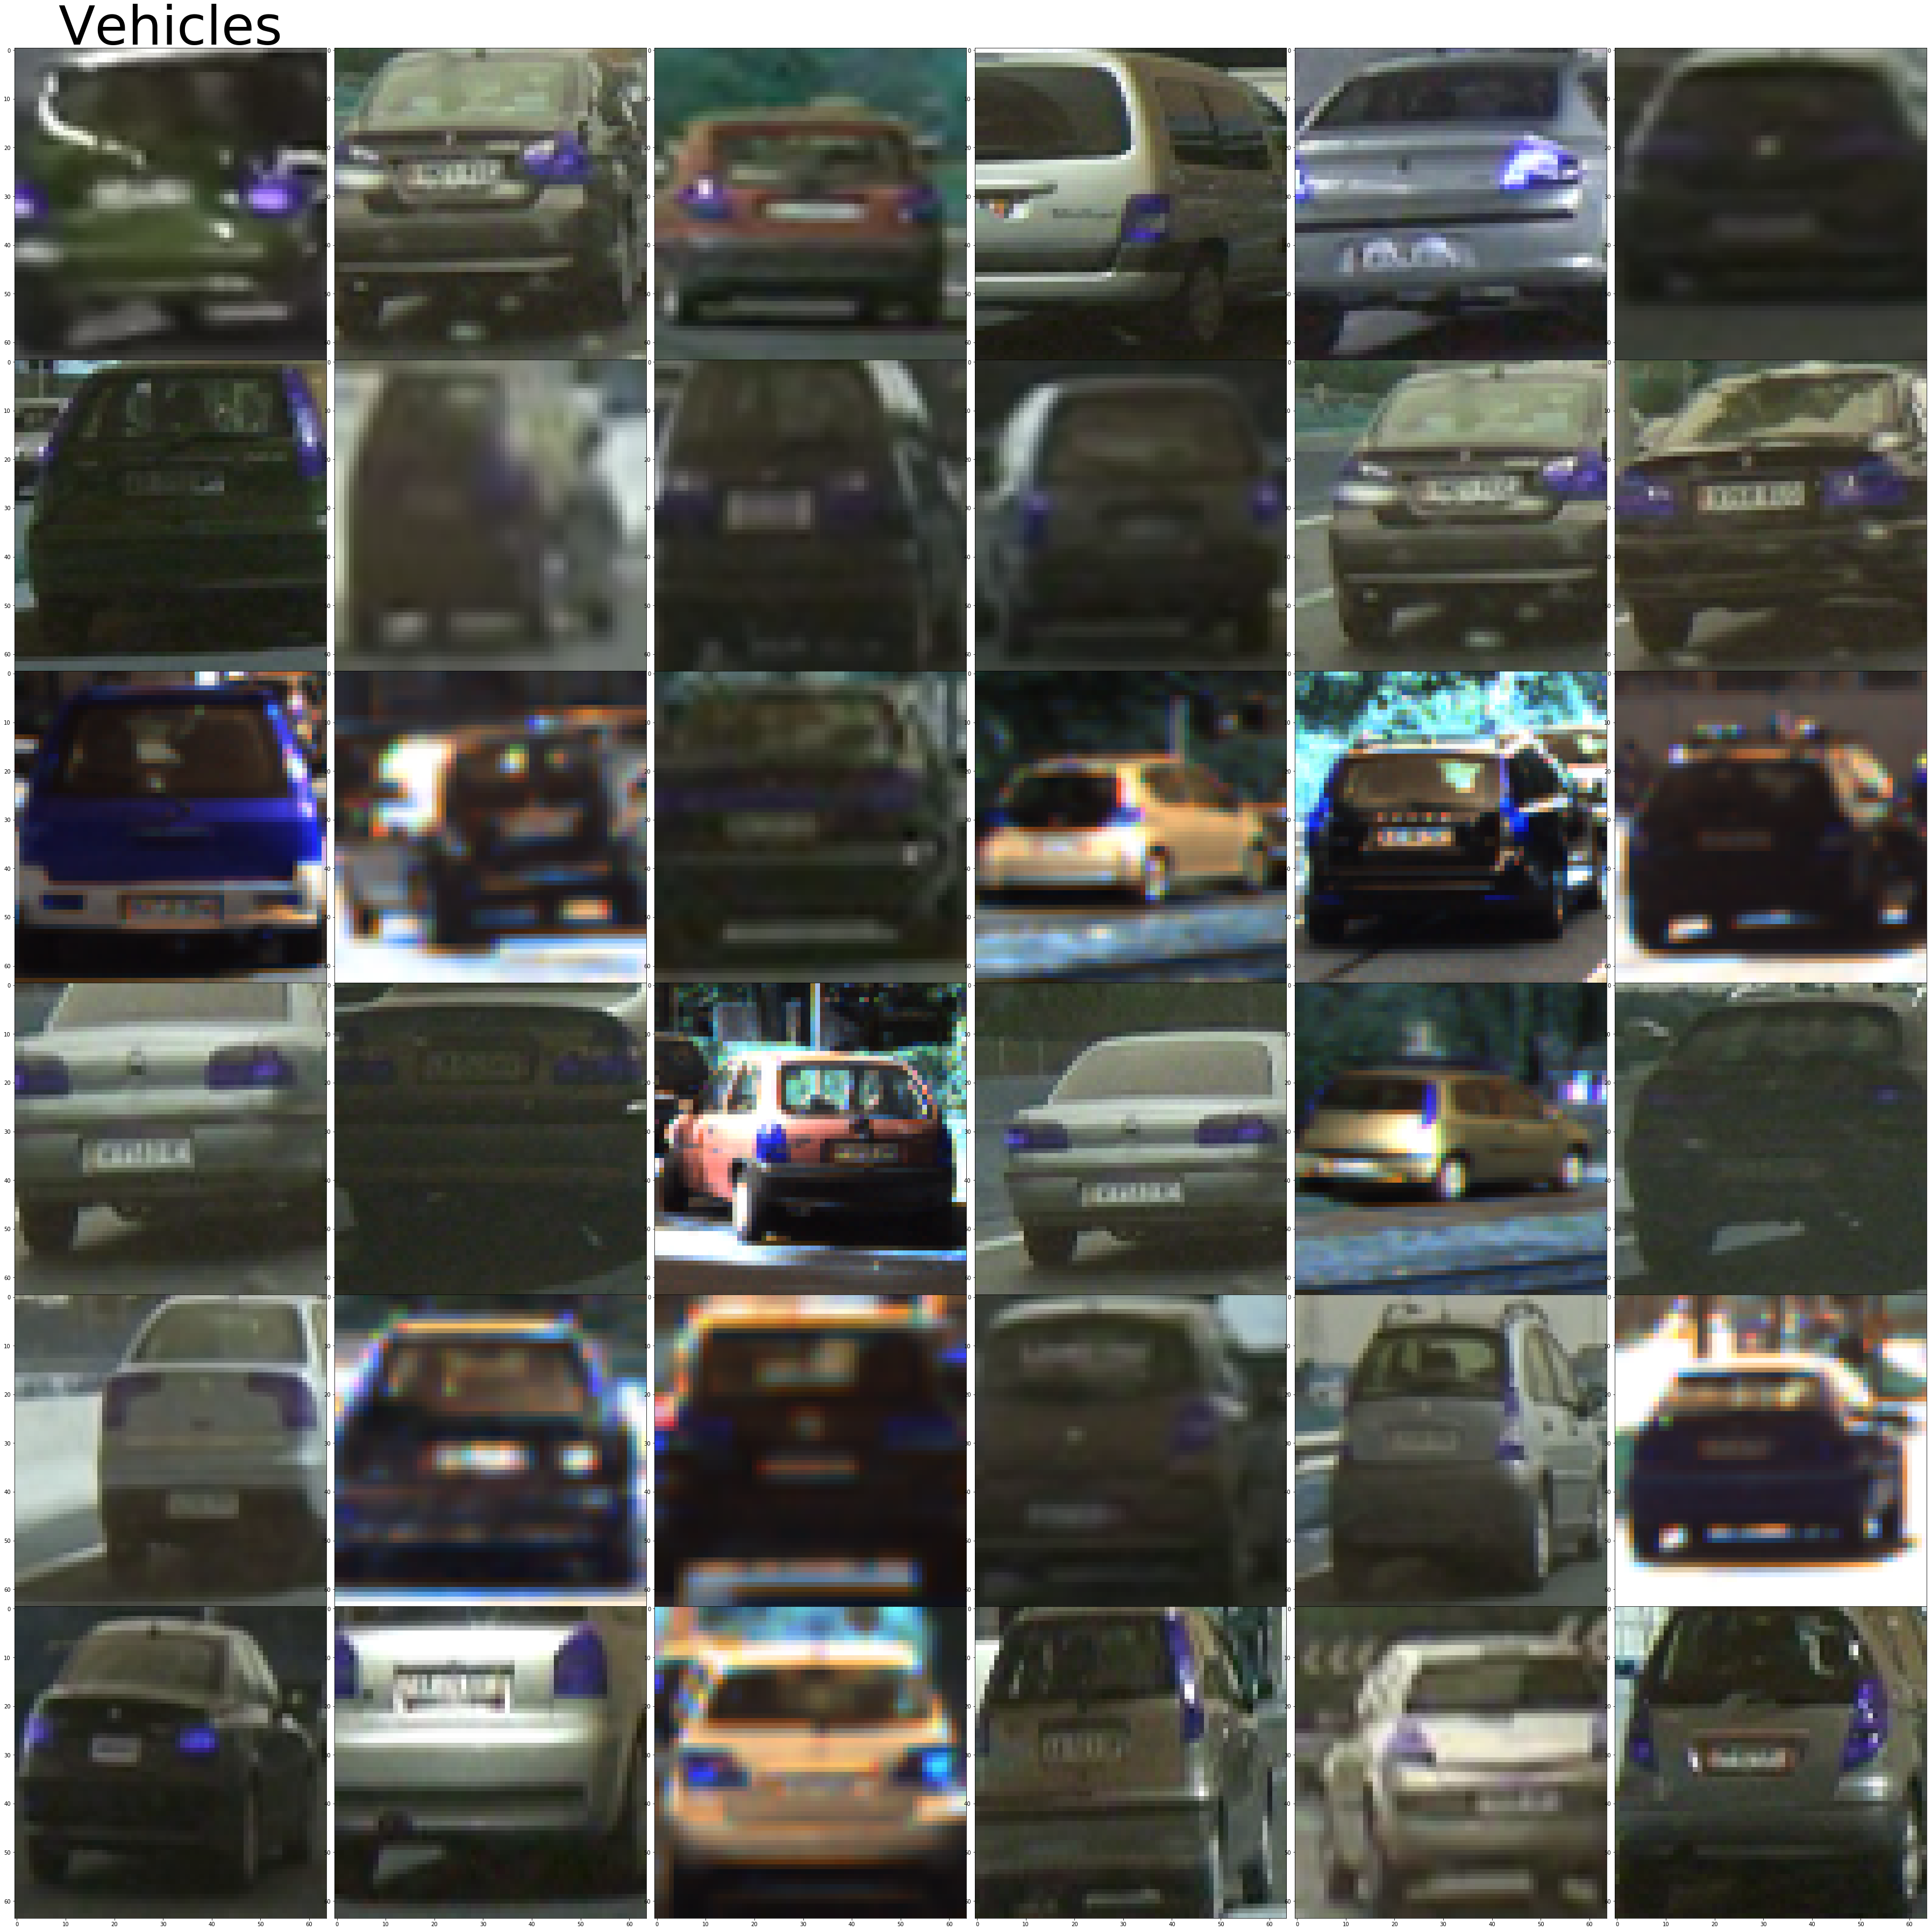

In [175]:
vehicle_true_false_file = 'vehicle_true_false_data.p'
with open(vehicle_true_false_file, mode='rb') as f:
    data = pickle.load(f)
vehicle_train = data['vehicle_train']
vehicle_valid = data['vehicle_valid']
vehicle_tests = data['vehicle_tests']
non_vehicle_train = data['non_vehicle_train']
non_vehicle_valid = data['non_vehicle_valid']
non_vehicle_tests = data['non_vehicle_tests']

ran_idx = []
vehicle_img = []
non_vehicle_img = []

for k in range(36):
    ran_idx.append(np.random.randint(0, 3333))
    vehicle_img.append(vehicle_train[ran_idx[k]])
    non_vehicle_img.append(non_vehicle_train[ran_idx[k]])
    
fig = plt.figure(figsize=(64, 64))
w_ratio = [1 for n in range(6)]
h_ratio = [1 for n in range(6)]
grid = gridspec.GridSpec(6, 6, wspace=0.0, hspace=0.0, width_ratios=w_ratio, height_ratios=h_ratio)

for idx, img in enumerate(vehicle_img):
    vimg = cv2.imread(img)
    ax = plt.Subplot(fig, grid[idx])
    ax.imshow(vimg)
    if idx == 0:
        ax.set_title('Vehicles', fontsize = 100)
    fig.add_subplot(ax)

#vehicle = plt.imread(vehicle_train[pick_one])
#non_vehicle = plt.imread(non_vehicle_train[pick_one])
pick_one = np.random.randint(0, 3333)
print('Check Vehicle True False Data:')
print(vehicle_train[pick_one])
print(non_vehicle_train[pick_one])

#plt.imshow(vehicle)
plt.show()

Check Vehicle True False Data:
train/vehicles/KITTI_extracted/2454.png
train/non-vehicles/GTI/image594.png


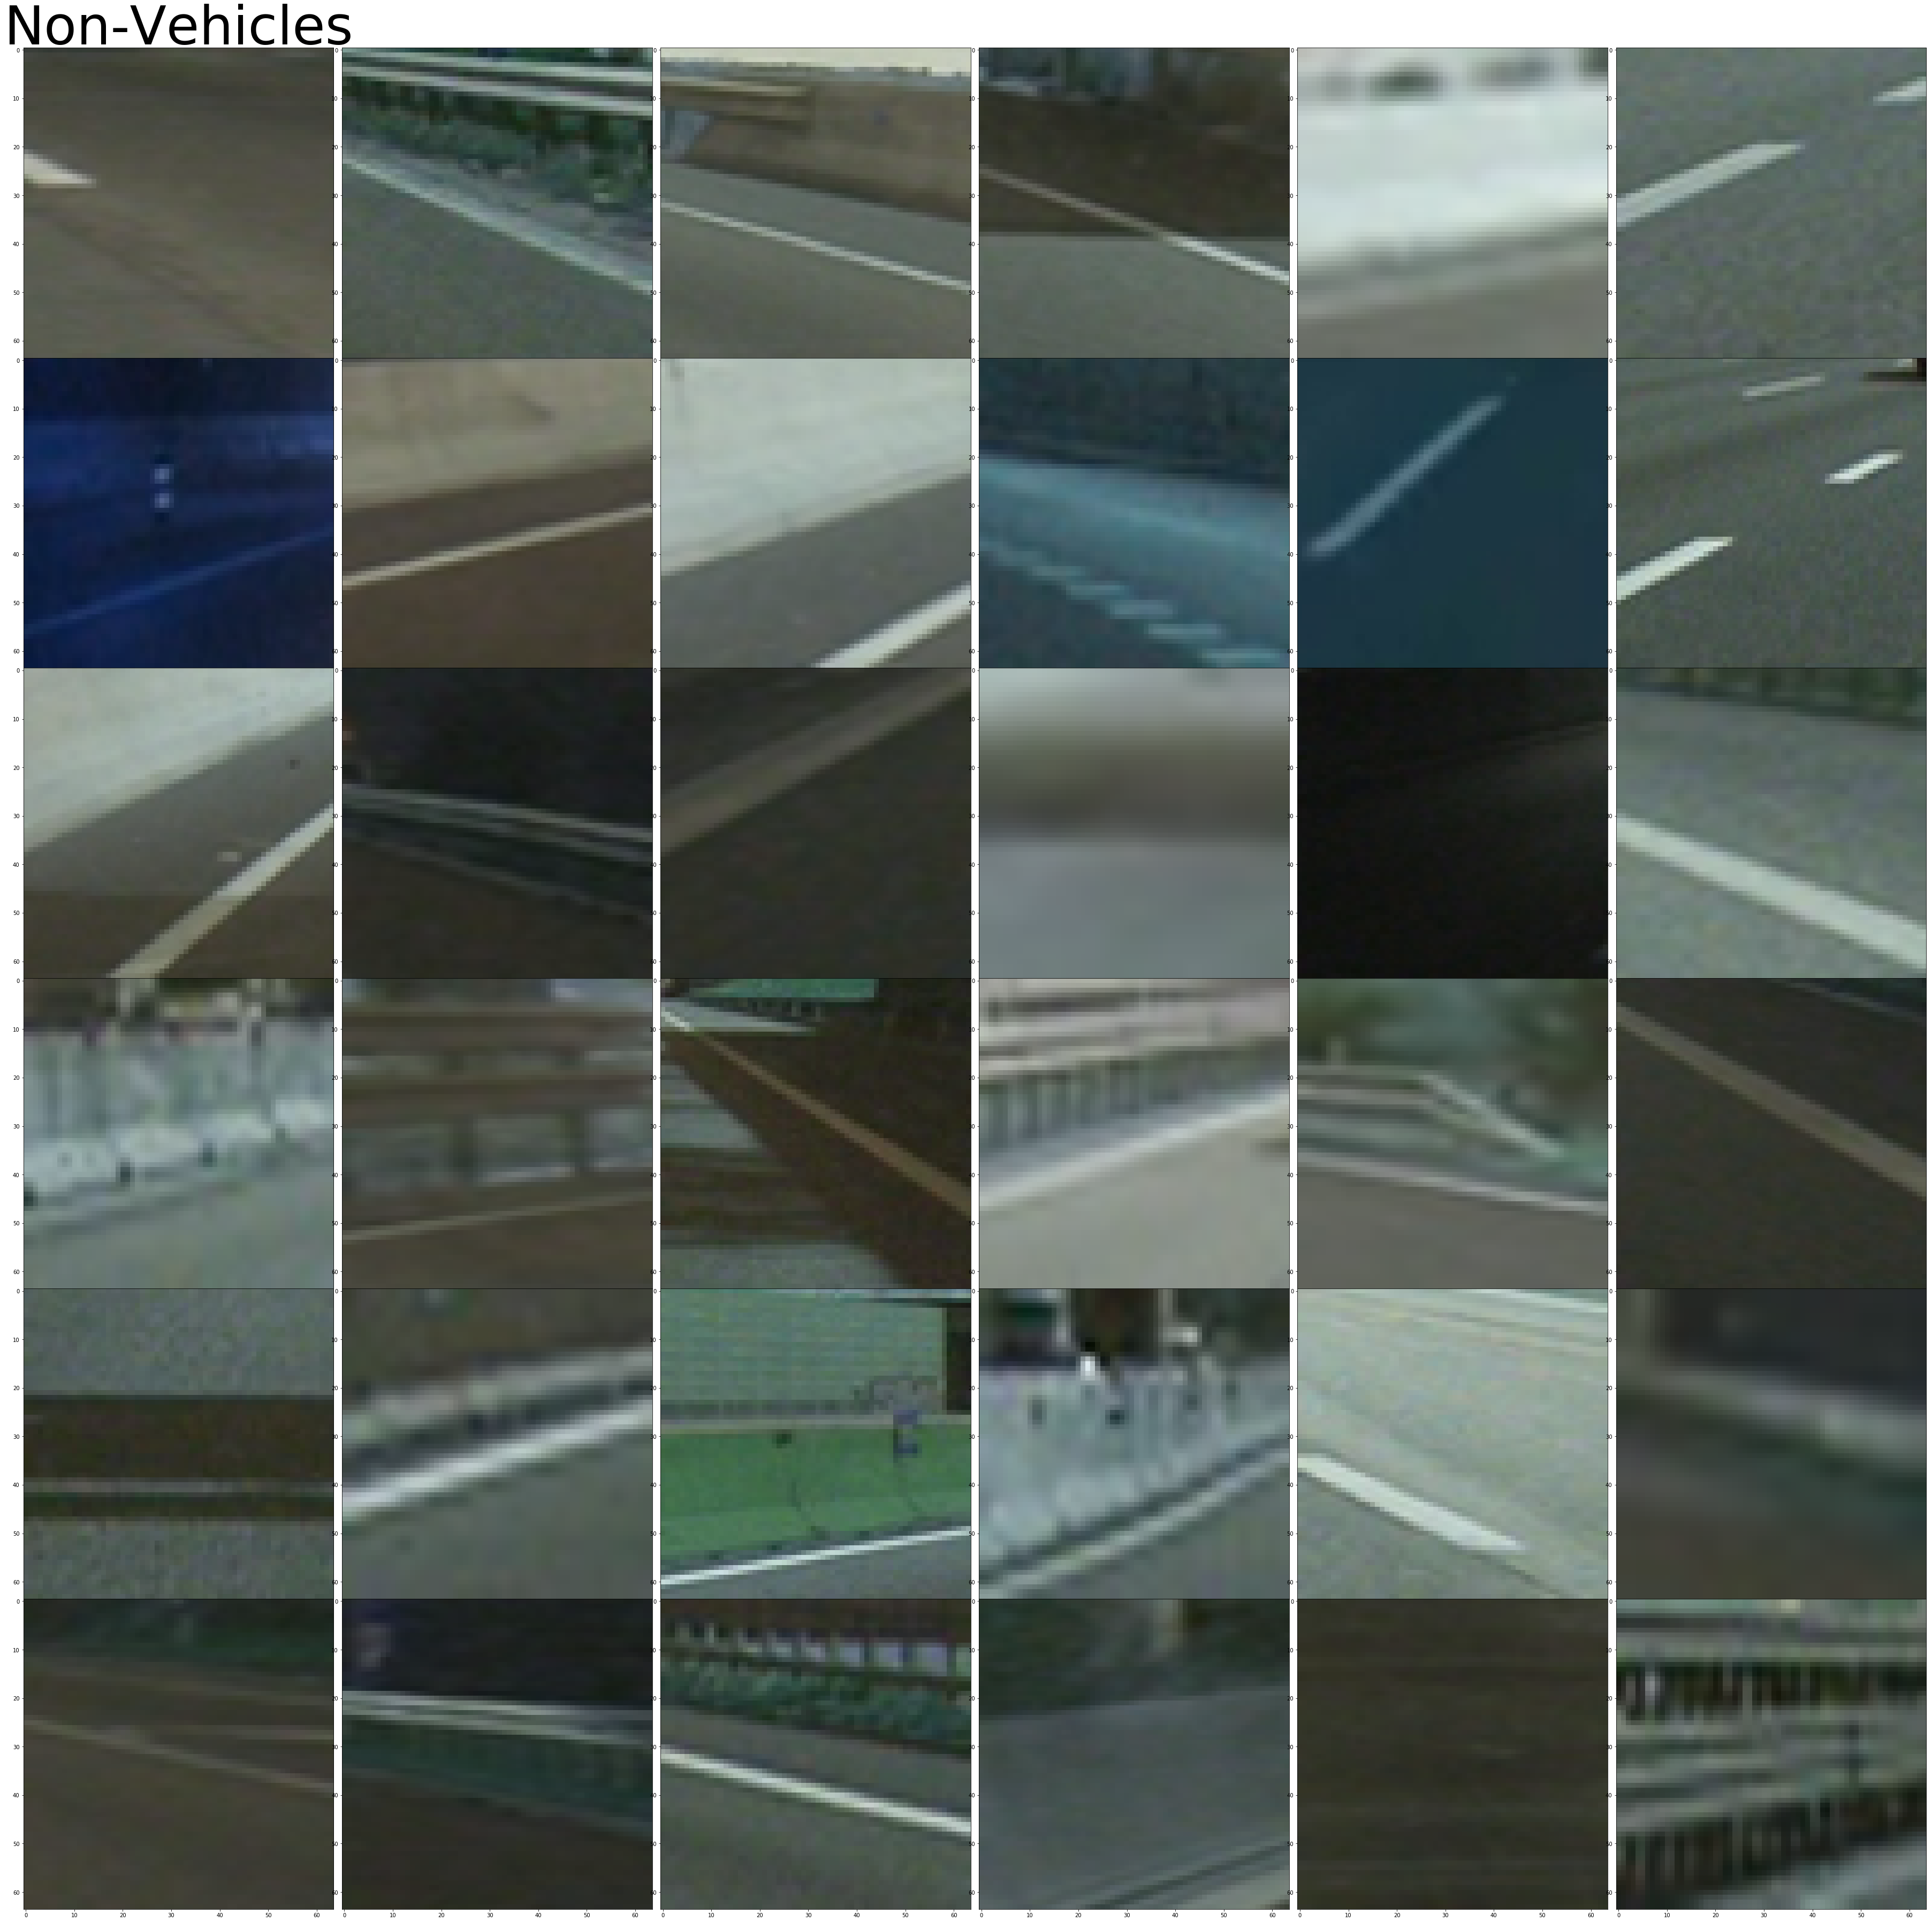

In [176]:
vehicle_true_false_file = 'vehicle_true_false_data.p'
with open(vehicle_true_false_file, mode='rb') as f:
    data = pickle.load(f)
vehicle_train = data['vehicle_train']
vehicle_valid = data['vehicle_valid']
vehicle_tests = data['vehicle_tests']
non_vehicle_train = data['non_vehicle_train']
non_vehicle_valid = data['non_vehicle_valid']
non_vehicle_tests = data['non_vehicle_tests']

ran_idx = []
vehicle_img = []
non_vehicle_img = []

for k in range(36):
    ran_idx.append(np.random.randint(0, 3333))
    vehicle_img.append(vehicle_train[ran_idx[k]])
    non_vehicle_img.append(non_vehicle_train[ran_idx[k]])
    
fig = plt.figure(figsize=(64, 64))
w_ratio = [1 for n in range(6)]
h_ratio = [1 for n in range(6)]
grid = gridspec.GridSpec(6, 6, wspace=0.0, hspace=0.0, width_ratios=w_ratio, height_ratios=h_ratio)

for idx, img in enumerate(non_vehicle_img):
    nvimg = cv2.imread(img)
    ax = plt.Subplot(fig, grid[idx])
    ax.imshow(nvimg)
    if idx == 0:
        ax.set_title('Non-Vehicles', fontsize = 100)
    fig.add_subplot(ax)

#vehicle = plt.imread(vehicle_train[pick_one])
#non_vehicle = plt.imread(non_vehicle_train[pick_one])
pick_one = np.random.randint(0, 3333)
print('Check Vehicle True False Data:')
print(vehicle_train[pick_one])
print(non_vehicle_train[pick_one])

#plt.imshow(vehicle)
plt.show()